# Grouping data

<b>Aggregate function</b>  

"집계함수"  

값의 집합의 최대값, 최소값, 평균, 합계 및 개수를 계산

값 집합에 대한 계산을 수행하고 단일 값을 반환  
- 여러 행으로부터 하나의 결과 값을 반환하는 함수  

SELECT 문의 GROUP BY 절과 함께 종종 사용됨  

제공하는 함수 목록  
- AVG(), COUNT(), MAX(), MIN(), SUM()  

AVG(), MAX(), MIN(), SUM()는 숫자를 기준으로 계산이 되어져야 하기 때문에 반드시 컬럼의 데이터 타입이 숫자(INTEGER)일 때만 사용 가능  

<a href="https://www.sqlitetutorial.net/sqlite-aggregate-functions">https://www.sqlitetutorial.net/sqlite-aggregate-functions</a>

<b>Aggregate function 예시</b>  

users 테이블의 전체 행 수 조회하기  

```sql
SELCT COUNT(*) FROM users;
```

전체 유저의 평균 balance를 조회하기  

```sql
SELECT AVG(balance) FROM users;
```

모든 유저의 지역 조회하기

```sql
SELECT DISTINCT country FROM users;
```

전라북도의 balnace 평균

```sql
SELECT country, AVG(balance) FROM users WHERE country='전라북도';
```

<b>GROUP BY clause</b>  

```sql
SELECT column_1, aggregate_function(column_2) FROM table_name
GROUP BY column1, column2;
```

"Make a set of summary rows from a set of rows"  

특정 그룹으로 묶인 결과를 생성  

선택된 컬럼 값을 기준으로 데이터(행)들의 공통 값을 묶어서 결과로 나타냄   

SELECT 문에서 선택적으로 사용가능한 절  

SELECT 문의 FROM 절 뒤에 작성  
- WHERE 절이 포함된 경우 WEHRE 절 뒤에 작성해야 함  

각 그룹에 대해 MIN, MAX, SUM, COUNT 또는 AVG와 같은 집계 함수(aggregate function)를 적용하여 각 그룹에 대한 추가적인 정보 제공가능.  

<b>Aggregate function 예시</b>  

지역별 평균 balnace 구하기

```sql
SELECT country, AVG(balance) FROM users
GROUP BY country;
```

``` sql
SELECT country, AVG(balance) FROM users
GROUP BY country ORDER BY AVG(balnace) DESC;
```

나이가 30살 이상인 사람들의 평균 나이를 구하기

```sql

SELECT AVG(age) FROM users WHERE age >= 30;
```

각 지역별로 몇 명씩 살고 있는지 조회하기  

```sql
SELECT country FROM users GROUP BY country;
```

그룹별로 포함되는 데이터의  수를 구하기  

```sql
SELECT country, COUNT(*) FROM users GROUP BY country;
```

<b>[참고] COUNT 참고사항</b>  

이전 쿼리에서 COUNT(), COUNT(age), COUNT(last_name) 등 어떤 컬럼을 넣어도 결과는 같음  

현재 쿼리에서 그룹화된 country를 기주능로 카운트하는 것이기 때문에 어떤 컬럼을 카운트해도 전체 개수는 동일하기 때문에  


<b>GROUP BY 실습</b>  

각 성씨가 몇 명씩 있는지 조회하기  

```sql
SELECT last_name, COUNT(*) FROM users
GROUP BY last_name;
```

각 성씨가 몇 명씩 있는지 조회하기  
AS 키워드를 사용해 컬럼명을 임시로 변경하여 조회할 수 있음  

```sql
SELECT last_name, COUNT(*) AS number_of_name FROM users GROUP BY last_name;
```

인원이 가장 많은 성씨 순으로 조회하기  

```sql
SELECT last_name, COUNT(*) FROM users
GROUP BY last_name ORDER BY COUNT(*) DESC;
```

각 지역별 평균 나이 조회하기  

```sql
SELECT country, AVG(age) FROM users
GROUP BY country;
```

### CHANGING data

<b>개요</b>  

데이터를 삽입, 수정, 삭제하기  
- INSERT
- UPDATE
- DELTE

&nbsp;

<b>사전 준비</b>  

실습 편의를 위해 새 테이블 생성  

```sql
CREATE TABLE classmates(
    name TEXT NOT NULL,
    age INTEGER NOT NULL,
    address TEXT NOT NULL
)
```

<b>INSERT statement</b>

```sql
INSERT INTO table_name(column1, colunm2, ...)
VALUES(value1, value2, ...);
```

새 행을 테이블에 삽입  

문법 규칙  

1. 먼저 INSERT INTO 키워드 뒤에 데이터를 삽입할 테이블의 이름을 지정  
2. 테이블 이름 뒤에 쉼표로 구분된 컬럼 목록 추가  
- 컬럼 목록은 선택 사항이지만 컬럼 목록을 포함하는 것이 권장됨  
3. VALUES 키워드 뒤에 쉼표로 구분된 값 목록을 추가  
- <font color='red'>만약 컬럼 목록을 생략하는 경우 값 목록의 모든 컬럼에 대한 값을 지정해야 함</font>  
- 값 목록의 값 개수는 컬럼 목록의 컬럼 개수와 같아야 함  


단일행 삽입하기

```sql
INSERT INTO classamte(name, age, adress)
VALUES ('홍길동', 23, '서울');
```

다음과 같이도 작성할 수 있음

```sql
INSERT INTO classmates
VALUES ('홍길동', 23, '서울');
```

여러 행 삽입하기

```sql
INSERT INTO classmates
VALUES
    ('김철수', 30, '경기'),
    ('이영미', 31, '강원'),
    ('박진성', 26, '전라'),
    ('최지수', 12, '충청'),
    ('정요한', 28, '경상');
```

<b>UPDATE statement</b>  

```sql
UPDATE table_name
SET column_1 = new_value_1,
    column_2 = new_value_2,
WHERE search_condition;
```

1. UPDATE 절 이후에 없데이트할 테이블을 지정  
2. SET 절에서 테이블의 각 컬럼에 대해 새 값을 설정  
3. WHERE 절의 조건을 사용하여 업데이트할 행을 지정  
- WHERE 절은 선택 사항
- 생략하면 UPDATE문은 테이블의 모든 행에 있는 테이터를 업데이트함  
4. 선택적으로 ORDER BY 및 LIMIT 절을 사용하여 업데이트할 행 수를 지정할 수도 있음  

&nbsp;

2번 데이터의 이름을 '김철수한무두루미', 주소를 '제주도'로 수정하기  

```sql
UPDATE classmates
SET name='김철수한무두루미',
    address='제주도'
WHERE rowid=2;
```

<b>DELETE statement</b>  

```sql
DELETE FROM table_name
WHERE search_condition;
```

테이블에서 행을 제거  

테이블의 한 행, 여러 행 및 모든 행을 삭제할 수 있음  

문법 규칙  

1. DELETE FROM 키워드 뒤에 행을 제거하려는 테이블의 이름을 지정  
2. WHERE 절에 검색 조건을 추가하여 제거할 행을 식별  
    - WHERE 절은 선택 사항이며, 생략하면, DELETE 문은 테이블의 모든 행을 삭제  
3. 선택적으로 ORDER BY 및 LIMIT 절을 사용하여 삭제할 행 수를 지정할 수도 있음  


5번 데이터 삭제하기  

```sql
DELETE FROM class WHERE rowid = 5;
```

삭제된 것 확인하기

```sql
SELECT rowid, * FROM classmates;
```

이름에 '영'이 포함되는 데이터를 삭제하기  

```sql
DELETE FROM classmates WHERE name LIKE '%영%';
```

테이블의 모든 데이터 삭제하기  

```sql
DELETE FROM classmates;
```

<b>테이블은 왜 나눌까?</b>   

데이터베이스, DBMS, SQL ...

결국 테이블에 CRUD 하는 것

그런데, 우리는 테이블을 나누는 것을 당연하게 생각하고 있음  

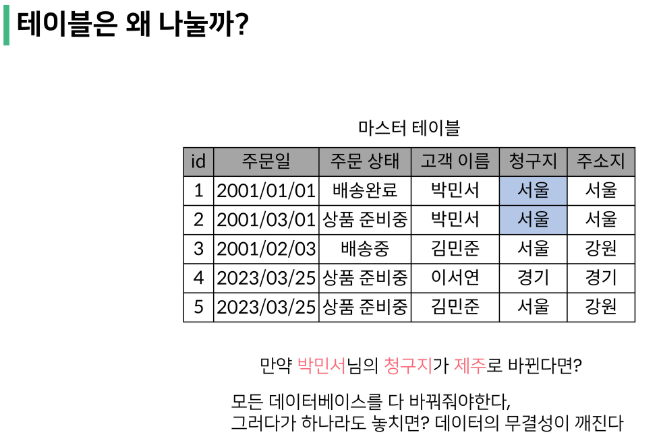

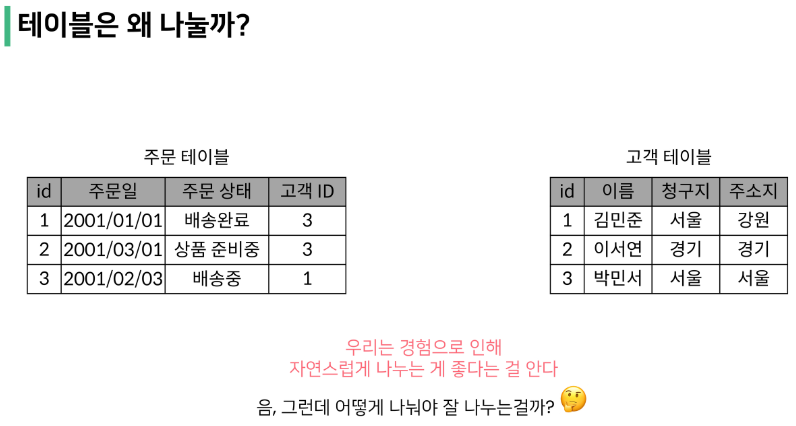

<b>데이터베이스 정규형</b>  

데이터베이스를 구조화하는 방법론  

데이터의 중복을 최소화하고 일관성과 무결성을 보장하기 위함  

데이터 구조를 더 좋은 구조로 바꾸는 것을 정규화라고 함  

관계형 데이터베이스의 경우 6개의 정규형이 있음  

제1, 제2, 제3 정규형을 조금씩만 알아보자  


<b>제 1 정규형</b>  

하나의 속성값이 복수형을 가지면 안 됨  

하나의 속성에는 값이 하나만 들어가야 한다는 것  

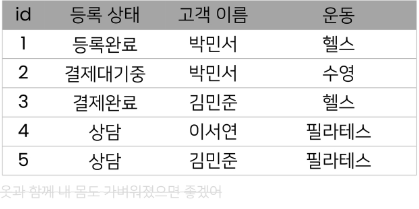

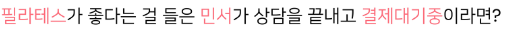

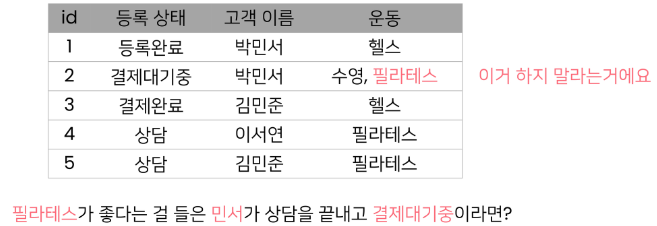

<b>제 2정규형</b>  

테이블이 기본키에 종속되지 않는 컬럼은 테이블이 분리 되어야 함  

테이블과 관련없는 것들은 따로 분리하라는 것  

테이블의 테마와 관련없는 컬럼은 다른 테이블로 분리하라는 것  


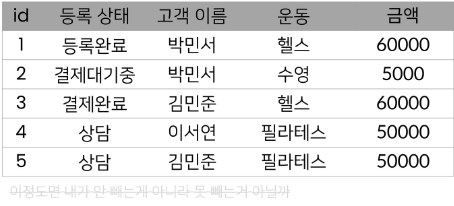



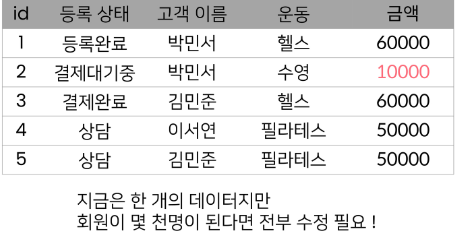

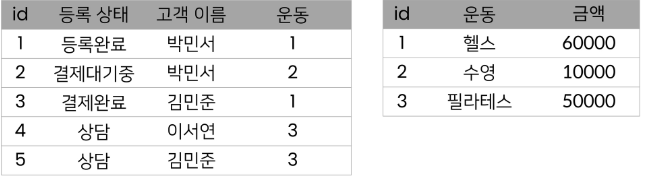

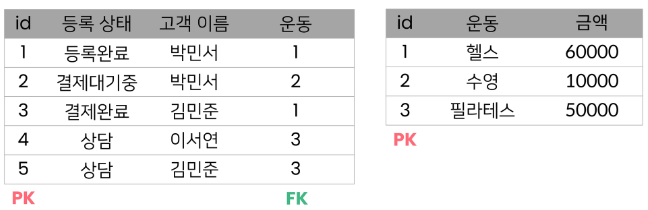

조금 더 알고 싶다면 <font color='green'>Composite PK(복합키)</font>와 <font color='green'>Partial Dependency</font>를 키워드도 공부할 것 !  

<b>제 3 정규형</b>  

다른(키가 아닌) 속성에 의존(종속)하는 속성은 따로 분리할 것  

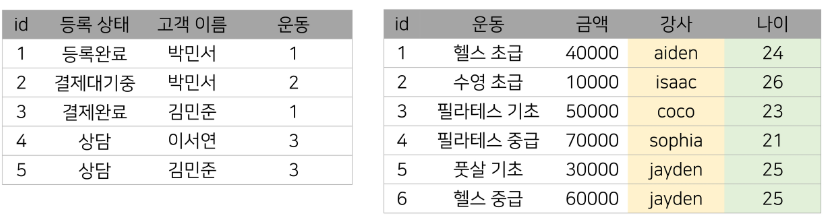

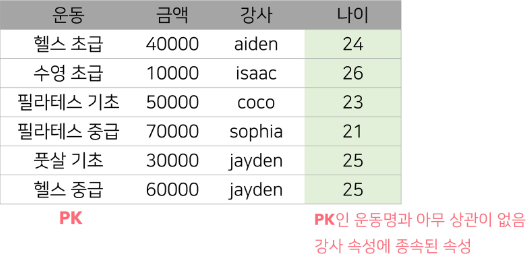

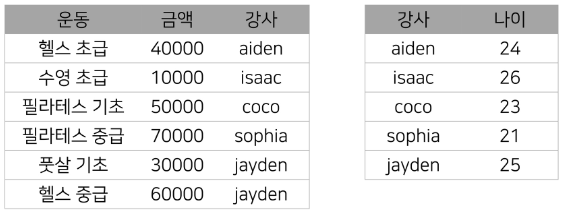

조금 더 알고 싶다면 <font color="green">Transitive Dependency</font> 키워드로 공부할 것

### JOIN

<b>테이블은 여러 개로 나눠진다.</b>  

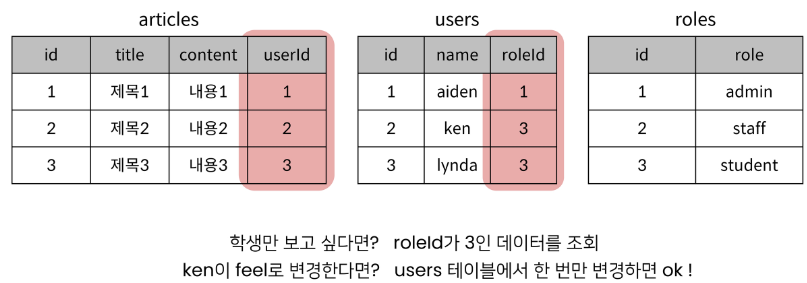

우리가 조회하려는 정보를 모아서 테이블 1개로 만들어야 한다  
== 테이블을 연결하는 것이 필요  
== <font color="red">JOIN(두 개 이상의 테이블에서 데이터를 가져와 결합하는 것)</font>

<b>테이블 합치기</b>  

```sql
SELECT * FROM articles, users;
```

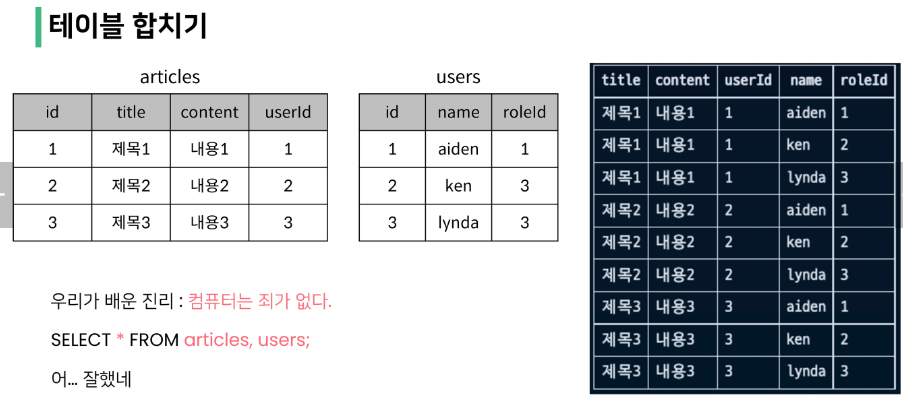

음... 잘못 나온 것 같은데..?

<b>CROSS JOIN</b>

우리가 원하는 데이터는?  
articles의 userId와 users의 id가 같은 것만 ...!

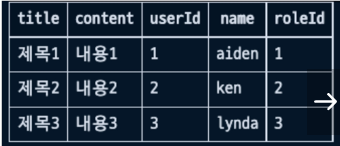

```sql
SELECT * FROM articles, users WHERE articles.userId=users.rowid;
SELECT * FROM articles, users WHERE userId=user.rowid; -- (이렇게도 가능)
```

<b>INNER JOIN</b>

```sql
SELECT * FROM articles, users WHERE articles.userId=users.rowid;

SELECT * FROM articles INNER JOIN users ON userid=users.rowid;
```

INNER JOIN 형태

```sql
{테이블1} INNER JOIN {테이블2} ON {조건식}
```


<b>LEFT (OUTER) JOIN</b>  

```sql
SELECT * FROM articles LEFT JOIN users
ON userId=users.rowid;
```

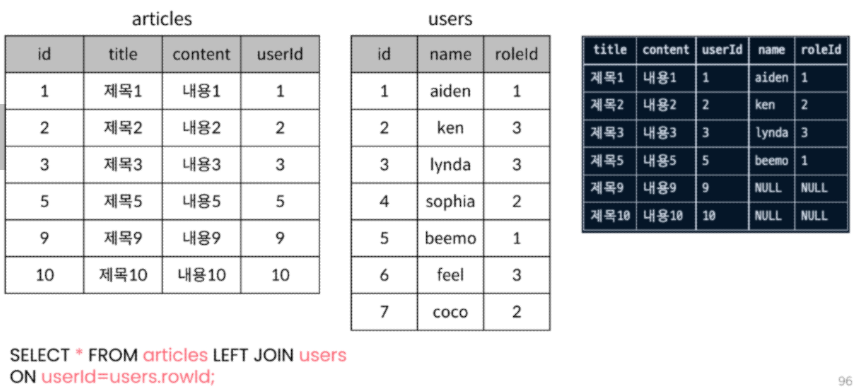

&nbsp;

<b>RIGHT (OUTER) JOIN</b>  

```sql
SELECT * FROM articles RIGHT JOIN users
ON userId=rowid;
```

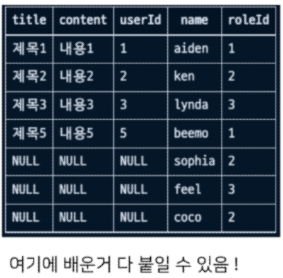

<b>정리</b>  

JOIN : 두 개 이상의 테이블에서 데이터를 가져와 결합하는 것  

- CROSS JOIN : 모든 조합 출력  
- INNER JOIN: 두 테이블에서 일치하는 데이터만 결과 출력  
- LEFT JOIN: 왼쪽 테이블의 데이터를 기준으로 오른쪽 데이터 결합, 없으면 NULL
- RIGHT JOIN: LEFT 반대  
- FULL OUTER JOIN

내가 필요한 데이터를 효율적으로 죄회할 수 있음  

SQLite3에서는 JOIN RIGHT, OUTER JOIN이 지원되지 않음

### SQL BASE2를 참조할 것!